In [1]:
from helper_fns import *

In [2]:
import os,sys
from IPython.display import Image

In [3]:
dataset = 'simulated'
threshold_type = 'absolute'

In [4]:
muh_fun_range = ['linear_regression','support_vector','knn', 'random_forest','polynomial_regression']
models = ['Linear Regression','SVR','KNN', 'Random Forest', 'Polynomial Regression']
sim_data_size_range = [100, 200, 400, 600, 800, 1000]
#cp_types = ['Jacknife+', 'Wt_Jacknife+', 'CV+', 'Wt_CV+', 'Split',  'Wt_Split']
cp_types = ['Jacknife+', 'CV+','Split']
bias_range = [0, 100, 150, 200]
tau = 10

In [5]:
bias = bias_range[0]
sim_data_size = sim_data_size_range[-1]
muh_fun = muh_fun_range[-1]
model = models[-1]

In [6]:
if (dataset == 'airfoil'):
    print('with size ' + str(sim_data_size))
    filler = '/sim_data_size_' + str(sim_data_size) + '/'

elif (dataset == 'simulated'):
    print('with size ' + str(sim_data_size) + ' and bias ' + str(bias))
    #filler = '/bias_' + str(int(bias)) + '/sim_data_size_' + str(sim_data_size) + '/'
    filler = '/No_bias/sim_data_size_' + str(sim_data_size) + '/'
else:
    filler = '/'

with size 1000 and bias 0


### Optimization results

In [7]:
# def optz_results_by_fun(metric, optz_type, muh_fun_name):
    
#     results_by_beta_u_max = pd.read_csv(dataset + '/Threshold_type_' + str(threshold_type) + '/' + \
#                                  muh_fun_name + '/optz_results/results_by_beta_u_max.csv', index_col=0)
#     results_by_beta_u_tau1 = pd.read_csv(dataset + '/Threshold_type_' + str(threshold_type) + '/' + \
#                                      muh_fun_name + '/optz_results/results_by_beta_u_tau1.csv', index_col=0)
#     results_by_beta_u_tau2 = pd.read_csv(dataset + '/Threshold_type_' + str(threshold_type) + '/' + \
#                                      muh_fun_name + '/optz_results/results_by_beta_u_tau2.csv', index_col=0)
#     results_by_beta_u_tau3 = pd.read_csv(dataset + '/Threshold_type_' + str(threshold_type) + '/' + \
#                                      muh_fun_name + '/optz_results/results_by_beta_u_tau3.csv', index_col=0)
    
    
#     metric_name = metric + '_' + optz_type
    
#     plt.plot(results_by_beta_u_max[metric_name], 'o-',color = 'black')
#     plt.plot(results_by_beta_u_tau1[metric_name], 'o-')
#     plt.plot(results_by_beta_u_tau2[metric_name], 'o-')
#     plt.plot(results_by_beta_u_tau3[metric_name], 'o-')
#     plt.xlabel('β')
#     plt.ylabel(metric)
#     plt.title(metric_name + ' metrics by uncertainty box - '+ muh_fun_name)
#     if optz_type == 'box':
#         plt.legend(['Maximum', 'Γ*Stdev, Γ=1', 'Γ*Stdev, Γ=2', 'Γ*Stdev, Γ=3'], \
#                   loc = 'upper center', ncol = 2)
#     plt.savefig(dataset + '/Threshold_type_' + str(threshold_type) + '/' + \
#                                      muh_fun_name + '/plots/' + metric + '_results_stdev_uncertainty_' + optz_type +'.png')
#     plt.show()
#     plt.close()
    
#     return None

In [8]:
# for i in range(len(muh_fun_range)):
#     optz_results_by_fun('VaR', 'box', muh_fun_range[i])

In [9]:
# for i in range(len(muh_fun_range)):
#     optz_results_by_fun('VaR', 'nominal', muh_fun_range[i])

In [10]:
# mean_error_prop = []
# for i in range(len(muh_fun_range)):
#     jacknife_plus_fn = pd.read_csv(dataset + '/Threshold_type_' + str(threshold_type) + '/' + \
#                                      muh_fun_range[i] + '/JAWS_coverage_by_trial/jacknife_plus_fn_by_trial.csv', index_col=0)
#     mean_error_prop.append(1-np.mean(jacknife_plus_fn.mean()))
    
# pd.DataFrame(mean_error_prop, muh_fun_range)

### Define variables and load in data

In [11]:
simulated_data = pd.read_csv('0.Datasets/simulated/simulated_data.csv')
X_simulated = simulated_data.iloc[:, 0:2].values
Y_simulated = simulated_data.iloc[:, 2].values
n_simulated = len(Y_simulated)

In [12]:
n_total = len(Y_simulated)
n_train = int(0.7*n_total)
n_test = n_total - n_train

In [13]:
X_train, Y_train, X_test, Y_test = generate_data_for_trials(1, n_train, n_total, eval('X_' + dataset), eval('Y_' + dataset), bias)

X_train = X_train[0]
Y_train = Y_train[0]
X_test = X_test[0]
Y_test = Y_test[0]

In [14]:
predictions_by_model = [linear_regression(X_train, Y_train, X_test),
                       support_vector(X_train, Y_train, X_test),
                       knn(X_train, Y_train, X_test),
                       polynomial_regression(X_train, Y_train, X_test)]

### Graphing function

In [15]:
# for i in range(len(muh_fun_range)):
#     plot_interval_sequence(filler, 'simulated', muh_fun_range[i], Y_test, predictions_by_model[i], 'relative', 0.175)

In [16]:
def plot_interval_sequence(filler, dataset, model, Y_test, Y_pred, threshold_type = 'absolute', tau = 10, max_count = 100):
    
    if threshold_type == 'absolute':
        test_lower_limit = Y_pred - tau
        test_upper_limit = Y_pred + tau
    else:
        test_lower_limit = Y_pred - tau*np.abs(Y_pred)
        test_upper_limit = Y_pred + tau*np.abs(Y_pred)
    

    # Plot at most max_count predictions
    if len(Y_test) <= max_count:
        max_count = len(Y_test)

    optimal_width = max_count / 4
    if optimal_width < 4:
        optimal_width = 4
    plt.figure(figsize = (optimal_width - 10, 8))
    ax = plt.gca() 
        
    valid_interval = (Y_test < test_upper_limit) & (Y_test > test_lower_limit)
    colors = np.array(['#e67e22', '#27ae60'])[valid_interval[:max_count].astype(int)]
    markers = np.array(['^', 'x'])[valid_interval[:max_count].astype(int)]
    
    
    for i in range(max_count):
        ax.plot([i, i], [test_lower_limit[i], test_upper_limit[i]], c = '#3498db')   
        ax.plot([i, i], [test_lower_limit[i], test_upper_limit[i] + 0.25], '_',c = '#3498db')
   
        ax.scatter(range(max_count)[i], Y_test[:max_count][i], marker = markers[i], zorder = 3, color = colors[i])
    
    legend_elements = [Line2D([0], [0],label ='Prediction band for Y'),
                       Line2D([0], [0], marker = 'X', color = 'w', label = 'True Y inside prediction band', markerfacecolor = '#27ae60'),
                       Line2D([0], [0], marker = '^', color = 'w', label = 'True Y outside prediction band', markerfacecolor = '#e67e22')]
    
    # Plot the observed samples
    ax.set_ylabel('Y', fontsize = 14)
    ax.set_xlabel('Test point index', fontsize = 14)
    ax.legend(handles = legend_elements)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
    
    plt.title('True value vs '+ model + ' prediction')
    plt.savefig(dataset + filler + 'Threshold_type_' + str(threshold_type) + '/' + \
                                    model + '/plots/prediction_intervals_' + dataset +'.png')
    
    return ax

<AxesSubplot:title={'center':'True value vs polynomial_regression prediction'}, xlabel='Test point index', ylabel='Y'>

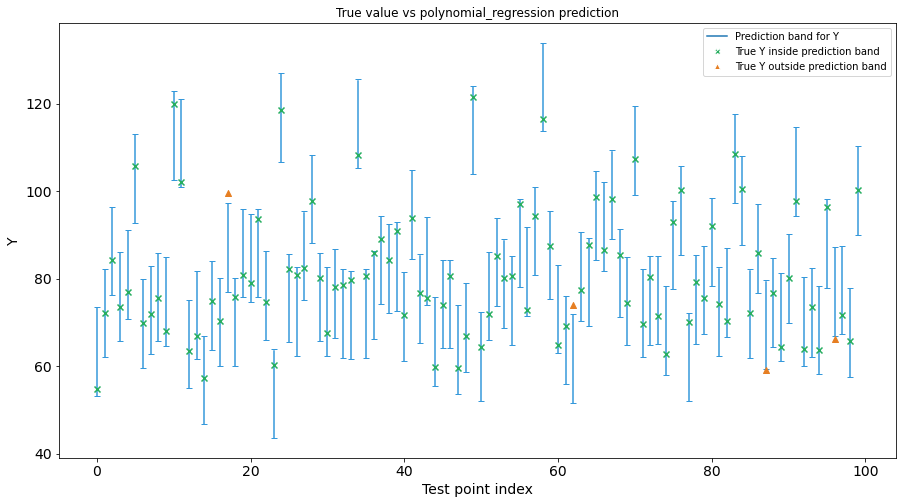

In [17]:
plot_interval_sequence(filler, 'simulated', muh_fun, Y_test, predictions_by_model[-1], 'absolute', 10)

<AxesSubplot:title={'center':'True value vs polynomial_regression prediction'}, xlabel='Test point index', ylabel='Y'>

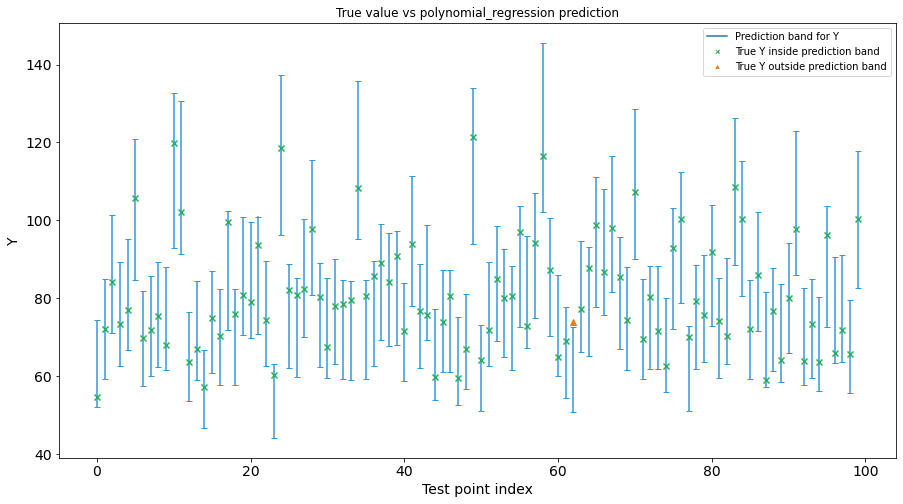

In [18]:
plot_interval_sequence(filler, 'simulated', muh_fun, Y_test, predictions_by_model[-1], 'relative', 0.175)

### CP Results

In [19]:
mean_coverage_by_trial = pd.read_csv(dataset + filler + 'Threshold_type_' + str(threshold_type) + '/' + \
                                muh_fun + '/JAWS_coverage_by_trial/mean_coverage.csv')

In [20]:
mean_coverage_by_trial

,Jacknife+,CV+,Split,Actual,True Probability
0,0.946106,0.945920,0.945869,0.946667,0.950374
1,0.934308,0.927641,0.931624,0.960000,0.941025
2,0.958379,0.955468,0.937322,0.920000,0.945806
3,0.936286,0.935773,0.928775,0.966667,0.945491
4,0.938968,0.935958,0.931624,0.946667,0.950374
...,...,...,...,...,...
95,0.945602,0.940661,0.937322,0.936667,0.946437
96,0.949330,0.943186,0.948718,0.933333,0.939535
97,0.939586,0.935340,0.951567,0.960000,0.951522
98,0.939895,0.937722,0.931624,0.943333,0.943390


In [21]:
pal = sns.color_palette('ch:start=.2,rot=-.3')
print(pal.as_hex())

['#c3e2e3', '#95c0ce', '#7399b8', '#59709c', '#424673', '#27213f']


In [22]:
cmap = ['#c3e2e3', '#7399b8','#424673', '#33a02c']
cmap_paired = [ '#c3e2e3', '#95c0ce', '#7399b8', '#59709c', '#424673', '#27213f']

In [23]:
for i in range(len(mean_coverage_by_trial.columns[0:3])):
    print(np.var(mean_coverage_by_trial.iloc[:,i])**0.5) 

0.005214940199269762
0.005520738357600091
0.013713621278722733


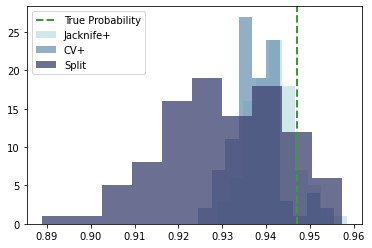

In [24]:
plt.axvline(x = np.mean(mean_coverage_by_trial['True Probability']), 
                    color = '#33a02c',
                    lw = 2,
                    linestyle = '--', 
                    label = 'True Probability')
for i in range(len(mean_coverage_by_trial.columns[0:3])):
    plt.hist(mean_coverage_by_trial.iloc[:,i],  
             alpha = 0.78, 
             color = cmap[i],
             label = mean_coverage_by_trial.columns[i] )

plt.legend(loc = 'upper left')
plt.savefig(dataset + filler + 'Threshold_type_' + str(threshold_type) + '/' + \
                            muh_fun +  '/plots/JAWS_mean_results_' + dataset +'.png')

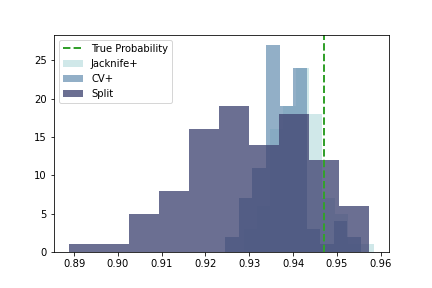

In [25]:
Image(dataset + filler + 'Threshold_type_' + threshold_type + '/' + muh_fun + '/plots/JAWS_mean_results_' + dataset + '.png', width = 600, height = 700)

### Simulated data - model comparison

In [26]:
ntrial = 100

In [27]:
# np.random.seed(98765) 

# X_train, Y_train, X_test, Y_test = generate_data_for_trials(ntrial, n_train, n_total, \
#                                                     eval('X_' + dataset), eval('Y_' + dataset), bias)

In [28]:
# kernel = RationalQuadratic(alpha = 1.0, length_scale = 1.0)
# gp = GaussianProcessRegressor(kernel = kernel, n_restarts_optimizer = 10)

In [29]:
# for i in tqdm.tqdm(range(1)):
    
#     #Get data for ith trial
#     X_train_trial = X_train[i]
#     Y_train_trial = Y_train[i]
#     X_test_trial = X_test[i]
    
#     #Standardize data
#     scaler_X = StandardScaler()
#     scaler_y = StandardScaler()
    
#     X_train_scaled = scaler_X.fit_transform(X_train_trial)
#     Y_train_scaled = scaler_y.fit_transform(Y_train_trial.reshape(-1, 1)).ravel()
    
#     y_scale_factor = scaler_y.scale_
#     y_mean = scaler_y.mean_
    
#     #Fit to training data
#     gp.fit(X_train_scaled, Y_train_scaled)
    
#     # Make predictions on new data points
#     X_test_scaled = scaler_X.fit_transform(X_test_trial)
#     Y_pred_scaled, sigma_scaled = gp.predict(X_test_scaled, return_std = True)
    
#     #Rescale predictions
#     Y_pred = Y_pred_scaled * y_scale_factor + y_mean
#     sigma = sigma_scaled * y_scale_factor

#     pd.DataFrame(Y_pred).to_csv(dataset + '/No_bias/sim_data_size_1000/GPR/y_pred_' + str(int(i)) + '.csv', index = False)
#     pd.DataFrame(sigma).to_csv(dataset + '/No_bias/sim_data_size_1000/GPR/sigma_pred_' + str(int(i)) + '.csv', index = False)

In [30]:
#plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle = "dotted")
# plt.figure(figsize = (12,6))
# plt.scatter(range(len(X_test[0])), Y_test[0], label = "Observations")
# plt.plot(range(len(X_test[0])), Y_pred, label = "Mean prediction")
# plt.fill_between(
#     range(len(X_test[0])),
#     Y_pred - 1.96 * sigma,
#     Y_pred + 1.96 * sigma,
#     alpha=0.5,
#     label=r"95% confidence interval",
# )
# plt.legend()
# plt.xlabel("$x$")
# plt.ylabel("$f(x)$")
# _ = plt.title("Gaussian process regression on noise-free dataset")

In [31]:
# sigma_pred_by_trial = []
# Y_pred_by_trial = []

# for i in range(ntrial):
    
#     sigma_pred_by_trial.append(pd.read_csv(dataset + '/No_bias/sim_data_size_1000/GPR/sigma_pred_' + str(int(i)) + '.csv')['0'].values)
#     Y_pred_by_trial.append(pd.read_csv(dataset + '/No_bias/sim_data_size_1000/GPR/Y_pred_' + str(int(i)) + '.csv')['0'].values)

# pd.DataFrame(sigma_pred_by_trial).to_csv(dataset + '/No_bias/sim_data_size_1000/GPR_' + str(ntrial) + 'Trial_' + 'Sigmas.csv', index = False)
# pd.DataFrame(Y_pred_by_trial).to_csv(dataset + '/No_bias/sim_data_size_1000/GPR_' + str(ntrial) + 'Trial_' + 'Preds.csv', index = False)

In [32]:
sigma_pred_by_trial = pd.read_csv(dataset + '/No_bias/sim_data_size_1000/GPR_' + str(ntrial) + 'Trial_' + 'Sigmas.csv')
GPR_mean_prob = np.mean(2*norm.cdf(tau/sigma_pred_by_trial)-1, axis = 1)
GPR_mean_prob = pd.DataFrame(GPR_mean_prob).rename(columns = {0:'value'})
GPR_mean_prob['model'] = 'GPR'
GPR_mean_prob['Legend'] = ''

In [33]:
sigma_pred_by_trial

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,7.735438,6.828627,6.101523,5.772680,6.133310,6.105607,7.888934,8.117786,4.792444,5.501473,...,7.160464,6.791554,7.431183,5.313042,6.098762,7.330607,6.111250,6.685683,6.988573,7.361659
1,6.698067,7.105035,6.901821,6.292780,7.120588,6.675287,5.843516,6.048371,6.370634,7.802059,...,6.885717,4.667238,7.564560,5.977377,5.992471,6.081083,5.788829,6.009753,6.351044,6.096286
2,6.779381,7.134968,6.906076,5.960775,6.998805,6.955333,7.127376,6.357250,8.050350,7.382359,...,7.124739,6.802420,6.894302,5.706262,7.191946,7.490556,6.789805,7.378460,6.630483,6.500219
3,6.822574,6.742042,7.361946,7.657735,6.907024,7.057819,5.865587,7.082749,6.385118,6.718555,...,8.474998,6.178360,7.183623,7.529829,7.190429,7.900915,6.071959,7.537692,6.137297,6.401697
4,7.612028,7.759716,6.504618,6.990590,7.357144,7.234239,6.267109,6.895549,4.777585,7.374303,...,7.386121,7.920865,6.899737,7.934235,7.784433,6.991062,7.516848,7.425859,6.733332,6.320146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6.095122,7.168837,5.573926,7.161083,7.270206,6.138452,6.171688,7.137857,5.692514,5.839935,...,5.834187,7.354507,6.626844,6.832558,7.169971,7.943731,6.883715,7.389624,7.385118,6.474291
96,6.531016,7.170499,6.760509,7.019975,6.913840,7.228245,5.950487,6.879373,7.356963,7.827142,...,4.546910,6.790890,6.924905,6.862037,7.515740,5.865715,6.771849,7.333145,6.516641,6.539021
97,4.519907,6.572942,5.695832,7.904977,7.029976,7.047580,5.491023,6.937836,7.664389,7.288408,...,7.726415,7.661243,6.963033,7.557289,6.898141,7.077717,7.676466,5.894340,6.569214,6.348372
98,6.294750,7.119930,3.847958,6.490523,6.660750,5.571483,6.393256,5.364395,5.493926,5.914879,...,6.434638,6.677556,5.274634,6.091811,5.324603,7.299440,7.209033,3.908405,5.613018,6.393300


In [34]:
def coverage_by_type(cp_types, sim_data_size, threshold_type, model):
    
    dataset = 'simulated'

    coverage_by_dataset_size = []

    for i in range(len(sim_data_size)):
        coverage_by_dataset_size.append(pd.read_csv(dataset + '/No_bias/sim_data_size_' + str(sim_data_size[i]) +\
                                '/Threshold_type_' + str(threshold_type) + '/' + model + \
                                '/JAWS_coverage_by_trial/mean_coverage.csv').rename(columns = \
                {'Jacknife+':'InvCP-Jacknife+','CV+':'InvCP-CV+', 'Split':'InvCP-Split'}))
        
        coverage_by_dataset_size[i]['JAWS-Jacknife+'] = pd.read_csv(dataset + '/No_bias/sim_data_size_' + str(sim_data_size[i]) +\
                                    '/' + 'Threshold_type_' + str(threshold_type) + '/' + str('polynomial_regression') + \
                                    '/JAWS_coverage_by_trial/jacknife_plus_fn.csv').iloc[:,1]
        coverage_by_dataset_size[i]['JAWS-CV+'] = pd.read_csv(dataset + '/No_bias/sim_data_size_' + str(sim_data_size[i]) +\
                                    '/' + 'Threshold_type_' + str(threshold_type) + '/' + str('polynomial_regression') + \
                                    '/JAWS_coverage_by_trial/cv_plus_fn.csv').iloc[:,1]
        coverage_by_dataset_size[i]['JAWS-Split'] = pd.read_csv(dataset + '/No_bias/sim_data_size_' + str(sim_data_size[i]) +\
                                    '/' + 'Threshold_type_' + str(threshold_type) + '/' + str('polynomial_regression') + \
                                    '/JAWS_coverage_by_trial/split_fn.csv').iloc[:,1]
        
        coverage_by_dataset_size[i]['sim_data_size'] = np.repeat(sim_data_size[i], 100)

        
    coverage_by_dataset_size_transform = pd.melt(pd.concat([coverage_by_dataset_size[0], 
                                                            coverage_by_dataset_size[1], 
                                                            coverage_by_dataset_size[2], 
                                                            coverage_by_dataset_size[3], 
                                                            coverage_by_dataset_size[4],
                                                            coverage_by_dataset_size[5]]),
                                              id_vars = ['sim_data_size'],
                                              value_vars = cp_types, 
                                              var_name = 'Legend')
    
    true_prob = pd.read_csv(dataset + '/No_bias/sim_data_size_' + str(sim_data_size[-1]) +\
                            '/Threshold_type_' + str(threshold_type) + '/' + model + \
                            '/JAWS_coverage_by_trial/mean_coverage.csv')['True Probability']
    
    
    plt.figure(figsize = (12,6))
    plt.axhline(y = np.mean(true_prob), linestyle = '--', color = '#33a02c', lw = 2, label = 'True Probability')
    sns.boxplot(x = 'sim_data_size',
        y = 'value',
        data = coverage_by_dataset_size_transform,
        palette = cmap_paired,
        hue = 'Legend')
    
    plt.legend()
    plt.ylabel('Coverage')
    plt.xlabel('Size of simulated dataset')
    plt.title('Coverage estimate distribution by estimate type - ' + model)
    plt.savefig(dataset + '/No_bias/sim_data_size_' + str(1000) + '/Threshold_type_' + str(threshold_type) + '/' + \
                            model + '/plots/coverage_estimates_by_type_' + dataset +'.png')
    
# def coverage_by_type(cp_types, random_coverage_by_model, sim_data_size, threshold_type, model):
    
#     dataset = 'simulated'
#     calc_type = ['JAWS', 'InvCP']
    
#     mean_coverage_by_model = pd.read_csv(dataset + '/No_bias/sim_data_size_' + str(sim_data_size) +\
#                                 '/' + 'Threshold_type_' + str(threshold_type) + '/' + str(model) + \
#                                 '/JAWS_coverage_by_trial/mean_coverage.csv')
    
#     mean_coverage_by_model['calc_type'] = np.repeat('Mean', 100)
#     random_coverage_by_model['calc_type'] = np.repeat('Random', 100)
    

#     coverage_transform = pd.melt(pd.concat([random_coverage_by_model, mean_coverage_by_model]),
#                                                 id_vars = ['calc_type'],
#                                                 value_vars = cp_types, 
#                                                 var_name = 'Legend')
    
#     true_prob = np.mean(pd.read_csv(dataset + '/No_bias/sim_data_size_' + str(sim_data_size) +\
#                             '/Threshold_type_' + str(threshold_type) + '/' + model + \
#                             '/JAWS_coverage_by_trial/mean_coverage.csv')['True Probability'].values)
    
#     plt.figure(figsize = (12,6))
    

#     plt.axhline(y = true_prob,  
#                 color = '#33a02c',
#                 lw = 2,
#                 linestyle = '--', 
#                 label = 'True Probability' if i == 0 else "")
    
#     sns.boxplot(x = 'calc_type',
#                 y = 'value',
#                 data = coverage_transform,
#                 hue = 'Legend',
#                 palette = cmap)
#     plt.legend(loc = 'upper left')
#     plt.ylabel('Coverage')
#     #plt.ylim((0.65,1.0))
#     plt.xlabel('Model')
#     plt.title('Coverage estimate distribution by calculation type')
    
#     plt.savefig(dataset +  '/No_bias/sim_data_size_1000/Threshold_type_' + str(threshold_type) + '/' + \
#                                     model + '/plots/coverage_by_type_' + dataset +'.png')
#     #plt.clf()
    
#     return None

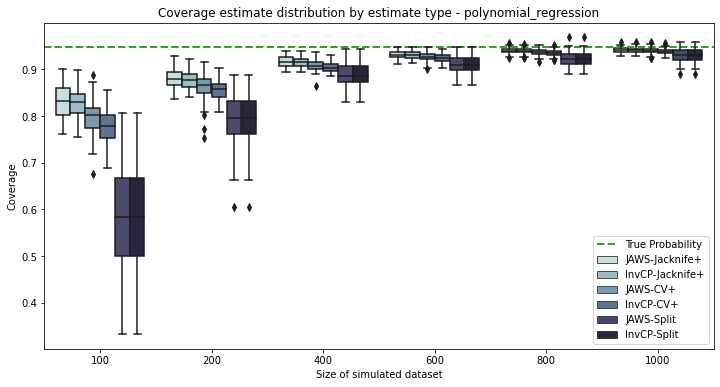

In [35]:
coverage_by_type(['JAWS-Jacknife+','InvCP-Jacknife+', 'JAWS-CV+', 'InvCP-CV+', 'JAWS-Split', 'InvCP-Split'], sim_data_size_range, threshold_type, muh_fun)

In [36]:
def coverage_by_bias(cp_types, sim_data_size, threshold_type, model, bias_range):
    
    dataset = 'simulated'
    
    mean_coverage_by_bias = []
    true_prob = []
    for i in range(len(bias_range)):
        mean_coverage_by_bias.append(pd.read_csv(dataset + '/bias_' + str(bias_range[i]) +'/sim_data_size_' + str(sim_data_size) +\
                                    '/' + 'Threshold_type_' + str(threshold_type) + '/' + str(model) + \
                                    '/JAWS_coverage_by_trial/mean_coverage.csv'))
        mean_coverage_by_bias[i]['bias'] = np.repeat(bias_range[i], 100)
        
        true_prob.append(pd.read_csv(dataset + '/bias_' + str(bias_range[i]) +'/sim_data_size_' + str(sim_data_size) +\
                                    '/' + 'Threshold_type_' + str(threshold_type) + '/' + str(model) + \
                                    '/JAWS_coverage_by_trial/mean_coverage.csv')['True Probability'])

    mean_coverage_by_bias_transform = pd.melt(pd.concat([mean_coverage_by_bias[0],
                                                          mean_coverage_by_bias[1],
                                                          mean_coverage_by_bias[2],
                                                          mean_coverage_by_bias[3],
                                                          #mean_coverage_by_bias[4],
                                                          # mean_coverage_by_bias[5]
                                                        ]),
                                                id_vars = ['bias'],
                                                value_vars = cp_types, 
                                                var_name = 'Legend')
    true_prob_mean = np.mean(true_prob, axis = 1)
    
    
    plt.figure(figsize = (20,6))
    for i in range(len(bias_range)):
        plt.axhline(y = true_prob_mean[i],  
                    xmin= 0.25*i, xmax=0.25*(i+1), 
                    color = '#33a02c',
                    lw = 2,
                    linestyle = '--', 
                    label = 'True Probability' if i == 0 else "")
    sns.boxplot(x = 'bias',
                y = 'value',
                data = mean_coverage_by_bias_transform,
                palette = cmap_paired,
                hue = 'Legend')
    #plt.legend(loc = 'upper left')
    plt.ylabel('Coverage')
    plt.xlabel('Covariate shift - Bias Parameter')
    plt.title('Coverage estimate distribution by bias')
    
    plt.savefig(dataset + '/bias_' + str(bias_range[0]) + '/sim_data_size_1000/Threshold_type_' + str(threshold_type) + '/' + \
                                     model + '/plots/coverage_estimates_by_bias_' + dataset +'.png')
    #plt.clf()
    
    return None

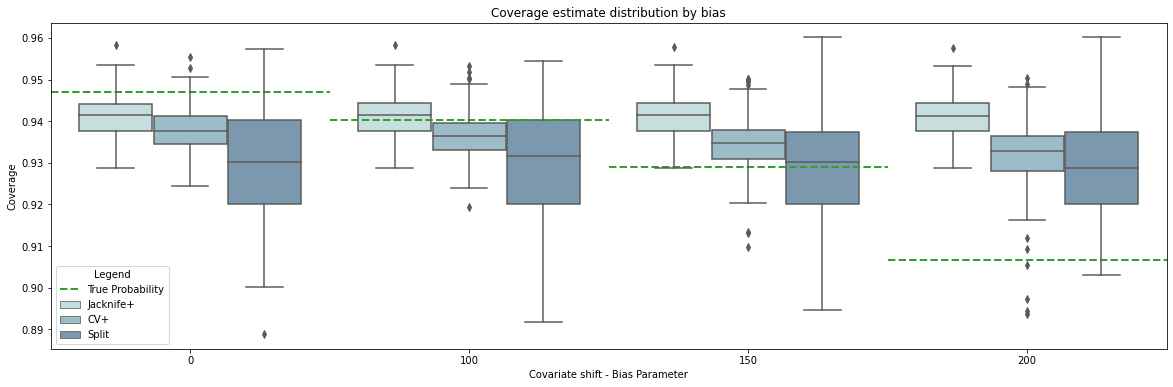

In [37]:
coverage_by_bias(cp_types, sim_data_size_range[5], threshold_type, muh_fun, bias_range)

In [42]:
def coverage_by_model(cp_types, sim_data_size, threshold_type, model, model_names):
    
    dataset = 'simulated'
    
    mean_coverage_by_model = []
    true_prob = []
    for i in range(len(model)):
        mean_coverage_by_model.append(pd.read_csv(dataset + '/No_bias/sim_data_size_' + str(sim_data_size) +\
                                    '/' + 'Threshold_type_' + str(threshold_type) + '/' + str(model[i]) + \
                                    '/JAWS_coverage_by_trial/mean_coverage.csv'))
        mean_coverage_by_model[i]['model'] = np.repeat(model_names[i], 100)
        
        true_prob.append(pd.read_csv(dataset + '/No_bias/sim_data_size_' + str(sim_data_size) +\
                            '/Threshold_type_' + str(threshold_type) + '/' + str(model[i]) + \
                            '/JAWS_coverage_by_trial/mean_coverage.csv')['True Probability'])

    mean_coverage_by_model_transform = pd.melt(pd.concat([mean_coverage_by_model[0], 
                                                                 mean_coverage_by_model[1], 
                                                                 mean_coverage_by_model[2], 
                                                                 mean_coverage_by_model[3], 
                                                                 mean_coverage_by_model[4]]),
                                                id_vars = ['model'],
                                                value_vars = cp_types, 
                                                var_name = 'Legend')
    #mean_coverage_total = pd.concat([mean_coverage_by_model_transform, GPR_mean_prob])
    
    true_prob_mean = np.mean(true_prob, axis = 1)
    
    plt.figure(figsize = (12,6))
    
    for i in range(len(model)):
        plt.axhline(y = true_prob_mean[i],  
                    xmin = 0.2*i, xmax = 0.2*(i+1), 
                    color = '#33a02c',
                    lw = 2,
                    linestyle = '--', 
                    label = 'True Probability' if i == 0 else "")
    sns.boxplot(x = 'model',
                y = 'value',
                data = mean_coverage_by_model_transform,
                hue = 'Legend',
                palette = cmap,
                showmeans=True,
                meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
    plt.legend(loc = 'upper left')
    plt.ylabel('Coverage')
    #plt.ylim((0.65,1.0))
    plt.xlabel('Model')
    plt.title('Coverage estimate distribution by model')
    
    for i in range(len(model)):
        plt.savefig(dataset +  '/No_bias/sim_data_size_1000/Threshold_type_' + str(threshold_type) + '/' + \
                                    model[i] + '/plots/coverage_by_model_' + dataset +'.png')
    #plt.clf()
    
    return None

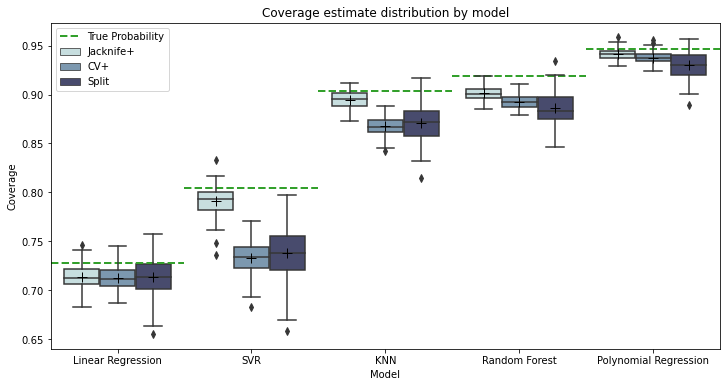

In [43]:
coverage_by_model(cp_types, sim_data_size, threshold_type, muh_fun_range, models)

In [40]:
def coverage_by_dataset_size(cp_types, sim_data_size, threshold_type, model):
    
    dataset = 'simulated'

    mean_coverage_by_dataset_size = []
    true_prob = []

    for i in range(len(sim_data_size)):
        mean_coverage_by_dataset_size.append(pd.read_csv(dataset + '/No_bias/sim_data_size_' + str(sim_data_size[i]) +\
                                '/Threshold_type_' + str(threshold_type) + '/' + model + \
                                '/JAWS_coverage_by_trial/mean_coverage.csv'))
        mean_coverage_by_dataset_size[i]['sim_data_size'] = np.repeat(sim_data_size[i], 100)
        
        true_prob.append(pd.read_csv(dataset + '/No_bias/sim_data_size_' + str(sim_data_size[i]) +\
                            '/Threshold_type_' + str(threshold_type) + '/' + str(model) + \
                            '/JAWS_coverage_by_trial/mean_coverage.csv')['True Probability'])
        
    mean_coverage_by_dataset_size_transform = pd.melt(pd.concat([mean_coverage_by_dataset_size[0], 
                                                         mean_coverage_by_dataset_size[1], 
                                                         mean_coverage_by_dataset_size[2], 
                                                         mean_coverage_by_dataset_size[3], 
                                                         mean_coverage_by_dataset_size[4],
                                                         mean_coverage_by_dataset_size[5]]),
                                              id_vars = ['sim_data_size'],
                                              value_vars = cp_types, 
                                              var_name = 'Legend')
    
    
    true_prob_mean = np.mean(true_prob, axis = 1)
        
    plt.figure(figsize = (12,6))
    
    for i in range(len(sim_data_size)):
        plt.axhline(y = true_prob_mean[i],  
                xmin = 0.15*(1.15*i), xmax = 0.15*(1.15*i+1), 
                color = '#33a02c',
                lw = 2,
                linestyle = '--', 
                label = 'True Probability' if i == 0 else "") 

    #plt.axhline(y = np.mean(true_prob), linestyle = '--', color = '#33a02c', lw = 2, label = 'True Probability')
    sns.boxplot(x = 'sim_data_size',
        y = 'value',
        data = mean_coverage_by_dataset_size_transform,
        palette = cmap,
        hue = 'Legend')
    
    plt.legend(loc = 'upper left')
    #plt.ylim((0.75,0.975))
    plt.ylabel('Coverage')
    plt.xlabel('Size of simulated dataset')
    plt.title('Coverage estimate distribution by size of dataset - ' + model)
    plt.savefig(dataset + '/No_bias/sim_data_size_' + str(1000) + '/Threshold_type_' + str(threshold_type) + '/' + \
                            model + '/plots/coverage_estimates_by_size_' + dataset +'.png')
    #plt.clf()
    
    return None

FileNotFoundError: [Errno 2] No such file or directory: 'simulated/No_bias/sim_data_size_100/Threshold_type_absolute/random_forest/JAWS_coverage_by_trial/mean_coverage.csv'

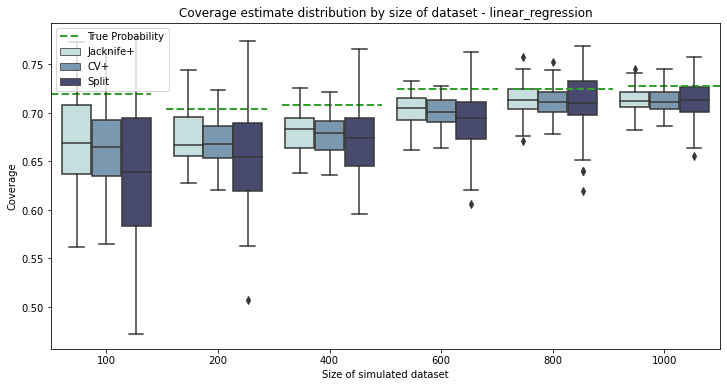

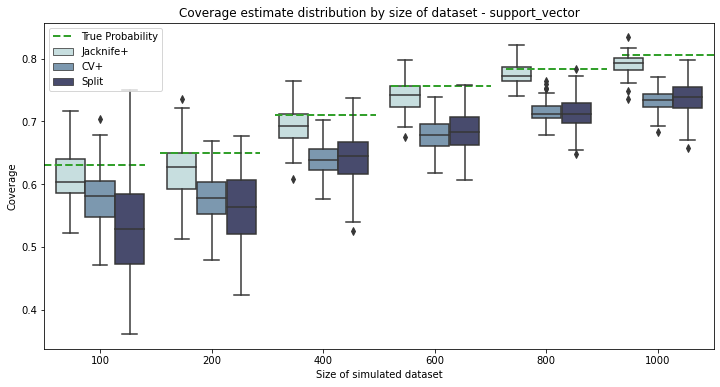

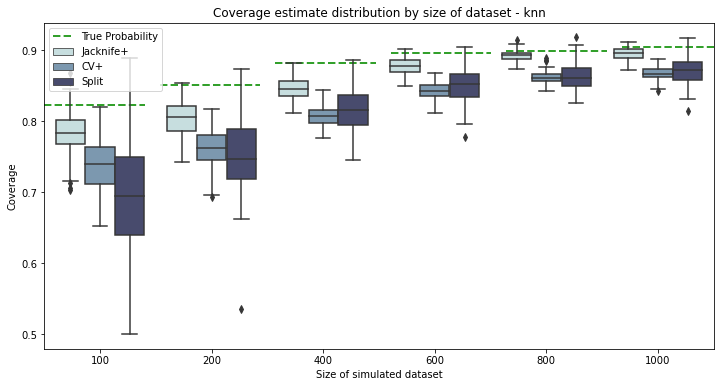

In [41]:
for i in range(len(muh_fun_range)):
    coverage_by_dataset_size(cp_types, sim_data_size_range, threshold_type, muh_fun_range[i])